# Cubic wave

$$
\frac{\partial^2u}{\partial t^2} = c^2 \frac{\partial^2u}{\partial x^2} + \alpha u^3
$$

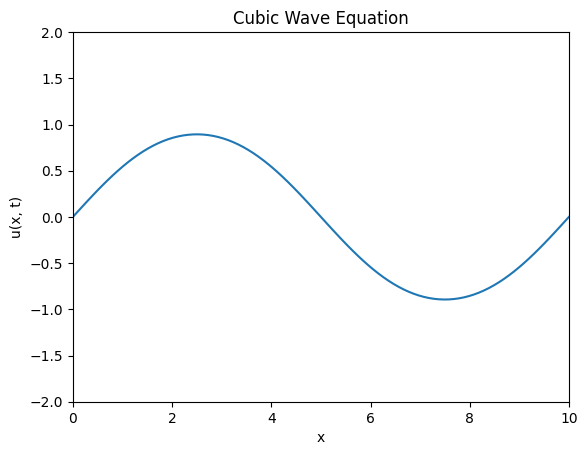

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters
L = 10.0  # Length of the domain
T = 10.0  # Total time
Nx = 100  # Number of spatial points
Nt = 1000  # Number of time points
c = 1.0  # Wave speed
alpha = 0.1  # Nonlinear coefficient
dx = L / (Nx - 1)  # Spatial step
dt = T / (Nt - 1)  # Time step

# Initial condition
x = np.linspace(0, L, Nx)
u = np.sin(2 * np.pi * x / L)  # Initial wave profile
u_prev = np.copy(u)  # u at t-dt

# Finite difference coefficients
C1 = (c * dt / dx) ** 2
C2 = alpha * dt ** 2

# Function to update the wave profile
def update(u, u_prev):
    u_next = np.zeros_like(u)
    for i in range(1, Nx - 1):
        u_next[i] = 2 * u[i] - u_prev[i] + C1 * (u[i+1] - 2 * u[i] + u[i-1]) + C2 * u[i] ** 3
    # Boundary conditions (fixed ends)
    u_next[0] = 0
    u_next[-1] = 0
    return u_next

# Create a figure for animation
fig, ax = plt.subplots()
line, = ax.plot(x, u)
ax.set_xlim(0, L)
ax.set_ylim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('u(x, t)')
ax.set_title('Cubic Wave Equation')

# Animation function
def animate(frame):
    global u, u_prev
    u_next = update(u, u_prev)
    u_prev, u = u, u_next
    line.set_ydata(u)
    return line,

# Create animation
ani = FuncAnimation(fig, animate, frames=Nt, interval=20, blit=True)

# Convert the animation to HTML5 video
video = ani.to_html5_video()

# Display the animation in the notebook
HTML(video)